mode 
rai
mode

# 1.
## Importing all the needed libraries

In [52]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


# 2.
## Importing our dataset 

In [2]:
# training dataset is used by train variable
train=pd.read_csv('train_Df64byy.csv')
# testing dataset is used by test variable
test=pd.read_csv('test_YCcRUnU.csv')


# 3.
## Data Basic info

In [3]:
print(train.info())
print('\n')
print('...........................................................................')
print('\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [4]:
# Finding the number of missing value in our dataset.
print(train.isna().sum())
print('\n')
print('...........................................................................')
print('\n')
print(test.isna().sum())

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64


...........................................................................


ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64


In [5]:
train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [6]:
test.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
count,21805.000000,21805.000000,21805.000000,21805.000000,13202.000000,21805.000000,21805.000000
mean,61785.000000,1748.737491,44.877734,42.748085,2.440085,15.138363,14220.306581
std,6294.705646,1438.358949,17.254898,17.269112,1.037627,6.302805,6497.996164
min,50883.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2152.000000
25%,56334.000000,535.000000,28.000000,27.000000,1.000000,12.000000,9285.000000
50%,61785.000000,1392.000000,44.000000,41.000000,3.000000,17.000000,13244.000000
75%,67236.000000,2712.000000,59.000000,57.000000,3.000000,20.000000,18201.600000
max,72687.000000,6185.000000,75.000000,75.000000,4.000000,22.000000,43776.000000


# 4.
##  Handling Missing data

### A. Holding_Policy_Type

<AxesSubplot:>

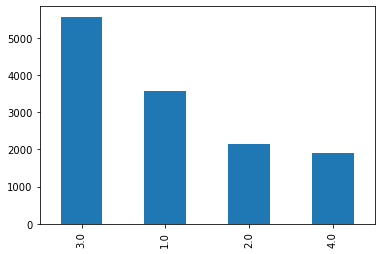

In [7]:
test['Holding_Policy_Type'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Holding_Policy_Type', ylabel='count'>

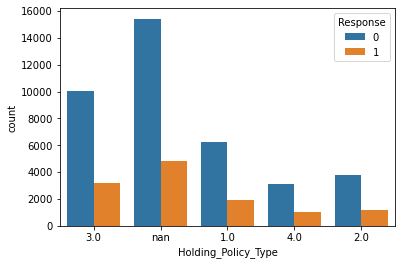

In [8]:
sns.countplot(x=train['Holding_Policy_Type'].astype(str),hue=train['Response'])

In [ ]:
train['HPT_miss']=np.where(train['Holding_Policy_Type'].isna(),1,0)

In [9]:
train['Holding_Policy_Type']=train['Holding_Policy_Type'].fillna(train['Holding_Policy_Type'].mode()[0])

In [10]:
test['Holding_Policy_Type']=test['Holding_Policy_Type'].fillna(test['Holding_Policy_Type'].mode()[0])

In [11]:
train['Holding_Policy_Type'].isna().sum(),test['Holding_Policy_Type'].isna().sum(),

(0, 0)

<AxesSubplot:xlabel='Holding_Policy_Type', ylabel='count'>

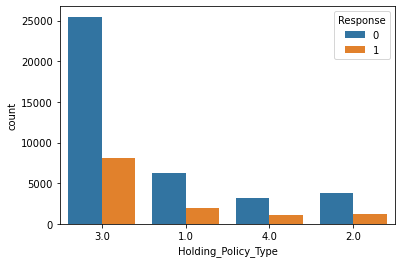

In [12]:
sns.countplot(x=train['Holding_Policy_Type'].astype(str),hue=train['Response'])

### B. Holding_Policy_Duration
filling the missign values with the Random sample imputation

<AxesSubplot:>

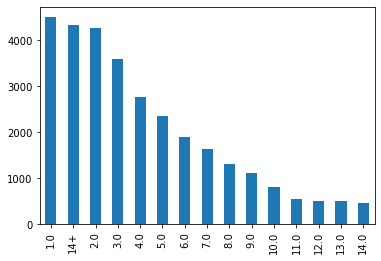

In [13]:
train['Holding_Policy_Duration'].value_counts().plot(kind='bar')

<AxesSubplot:>

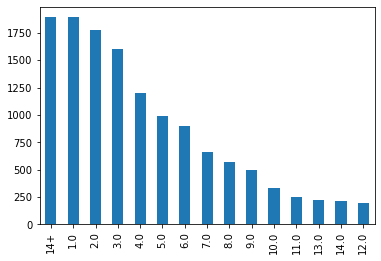

In [14]:
test['Holding_Policy_Duration'].value_counts().plot(kind='bar')

In [15]:
train['Holding_Policy_Duration']=train['Holding_Policy_Duration'].where(train['Holding_Policy_Duration']!='14+',15)

In [16]:
test['Holding_Policy_Duration']=test['Holding_Policy_Duration'].where(test['Holding_Policy_Duration']!='14+',15)

In [17]:
random_sample=train['Holding_Policy_Duration'].dropna().sample(train['Holding_Policy_Duration'].isna().sum(),random_state=0)
random_sample1=test['Holding_Policy_Duration'].dropna().sample(test['Holding_Policy_Duration'].isna().sum(),random_state=0)


In [18]:
random_sample1.index=test[test['Holding_Policy_Duration'].isnull()].index
test.loc[test['Holding_Policy_Duration'].isnull(),'Holding_Policy_Duration']=random_sample1

In [19]:
##pandas need to have same index in order to merge the dataset
random_sample.index=train[train['Holding_Policy_Duration'].isnull()].index
train.loc[train['Holding_Policy_Duration'].isnull(),'Holding_Policy_Duration']=random_sample



In [20]:
train['Holding_Policy_Duration'].isna().sum(),test['Holding_Policy_Duration'].isna().sum()

(0, 0)

<AxesSubplot:xlabel='Holding_Policy_Duration', ylabel='count'>

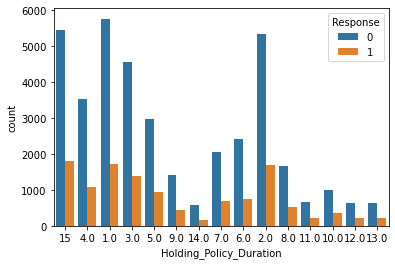

In [21]:
sns.countplot(x=train['Holding_Policy_Duration'],hue=train['Response'])

### 3. Health Indicator
filling the missing values with random sample imputation

<AxesSubplot:>

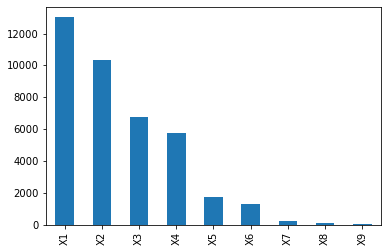

In [22]:
train['Health Indicator'].value_counts().plot(kind='bar')

<AxesSubplot:>

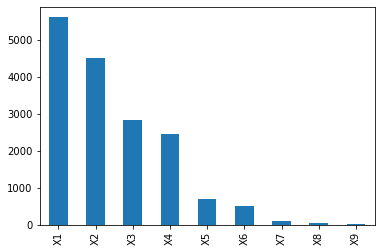

In [23]:
test['Health Indicator'].value_counts().plot(kind='bar')

In [24]:
train['Health Indicator']=train['Health Indicator'].fillna(train['Health Indicator'].mode()[0])

In [25]:
test['Health Indicator']=test['Health Indicator'].fillna(test['Health Indicator'].mode()[0])

<AxesSubplot:>

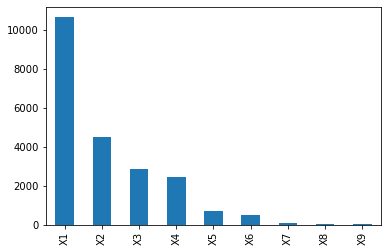

In [26]:
test['Health Indicator'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Health Indicator', ylabel='count'>

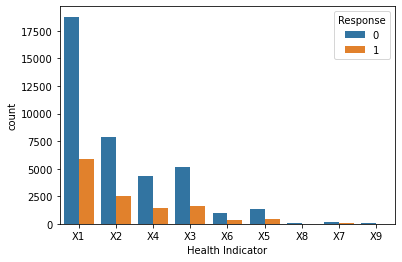

In [27]:
sns.countplot(x=train['Health Indicator'],hue=train['Response'])

In [28]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         50882 non-null  object 
 9   Holding_Policy_Duration  50882 non-null  object 
 10  Holding_Policy_Type      50882 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

(None, None)

# 5.
## Visualized representation of the relation between “Response” and other Features.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

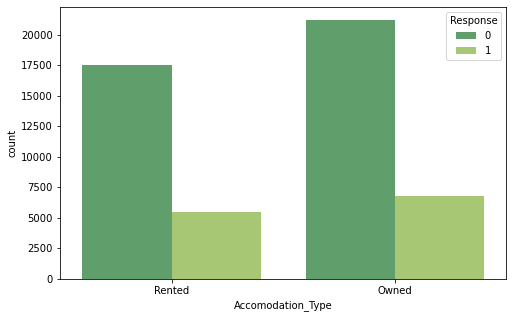

In [29]:
plt.figure(figsize=(8,5))
sns.countplot('Accomodation_Type',data=train,palette='summer',hue='Response')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Health Indicator', ylabel='count'>

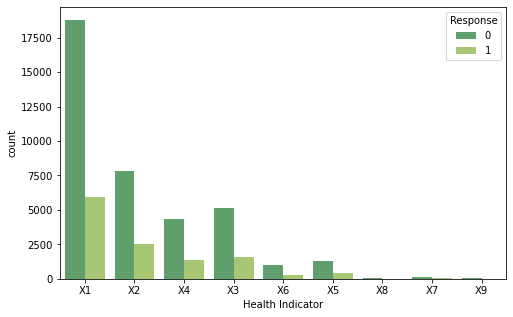

In [30]:
plt.figure(figsize=(8,5))
sns.countplot('Health Indicator',data=train,palette='summer',hue='Response')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Holding_Policy_Duration', ylabel='count'>

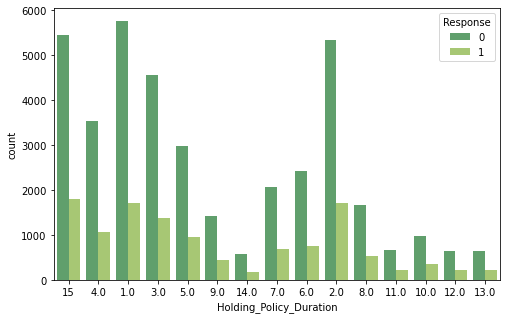

In [31]:
plt.figure(figsize=(8,5))
sns.countplot('Holding_Policy_Duration',data=train,palette='summer',hue='Response')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='count'>

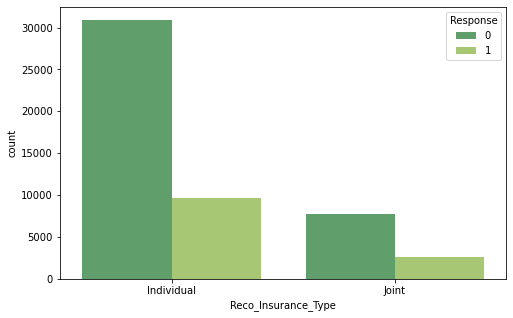

In [32]:
plt.figure(figsize=(8,5))
sns.countplot('Reco_Insurance_Type',data=train,palette='summer',hue='Response')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Holding_Policy_Type', ylabel='count'>

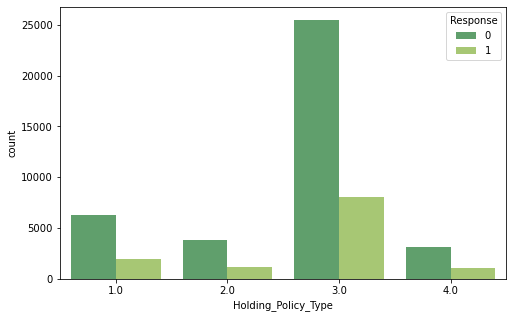

In [33]:
plt.figure(figsize=(8,5))
sns.countplot('Holding_Policy_Type',data=train,palette='summer',hue='Response')

# 6
## Preparing data for our model

In [34]:
# Dropping “ID” and “Region_Code”.
train.drop(labels=['ID','Region_Code'],axis=1,inplace=True)
test.drop(labels=['ID','Region_Code'],axis=1,inplace=True)

In [35]:
train['Holding_Policy_Duration']=train['Holding_Policy_Duration'].astype('float64')
test['Holding_Policy_Duration']=test['Holding_Policy_Duration'].astype('float64')

In [36]:
'''  Separating dependent and independent variable.
        X=independent
        Y=dependent                    '''
y=train.Response
x=train.drop(labels=['Response'],axis=1)

In [37]:

le = LabelEncoder()
var_mod = ['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Holding_Policy_Type']
le = LabelEncoder()
for i in var_mod:
    x[i] = le.fit_transform(x[i])
    test[i] = le.fit_transform(test[i])
    
#One Hot Coding:
x = pd.get_dummies(x, columns=['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Holding_Policy_Type'])
test = pd.get_dummies(test, columns=['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Holding_Policy_Type'])

In [38]:
x.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Upper_Age                50882 non-null  int64  
 1   Lower_Age                50882 non-null  int64  
 2   Holding_Policy_Duration  50882 non-null  float64
 3   Reco_Policy_Cat          50882 non-null  int64  
 4   Reco_Policy_Premium      50882 non-null  float64
 5   City_Code_0              50882 non-null  uint8  
 6   City_Code_1              50882 non-null  uint8  
 7   City_Code_2              50882 non-null  uint8  
 8   City_Code_3              50882 non-null  uint8  
 9   City_Code_4              50882 non-null  uint8  
 10  City_Code_5              50882 non-null  uint8  
 11  City_Code_6              50882 non-null  uint8  
 12  City_Code_7              50882 non-null  uint8  
 13  City_Code_8              50882 non-null  uint8  
 14  City_Code_9           

(None, None)

In [39]:
x = x.select_dtypes(exclude='object')
test = test.select_dtypes(exclude='object')

In [40]:
x.shape,test.shape

((50882, 60), (21805, 60))

In [41]:
# 20% data as validation set
from sklearn.model_selection import train_test_split
Xtrain,Xvalid,ytrain,yvalid = train_test_split(x,y,test_size=0.2,random_state=22)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

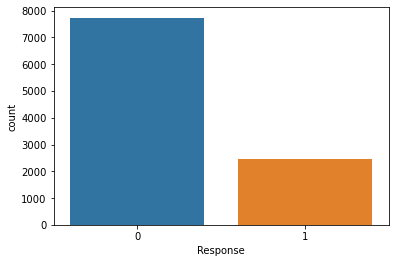

In [42]:
sns.countplot(yvalid)

# 7.
## Applying {' Logistic Regression ' , ' K Neighbors Regressor ' ,  ' Decision Tree Regressor '} methods to our datasets.

In [43]:
algos = [LogisticRegression(),KNeighborsRegressor(), DecisionTreeRegressor()]

names = ['LogisticRegression','K Neighbors Regressor', 'Decision Tree Regressor']

roc_auc_list = []


In [44]:
for name in algos:
    model = name
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xvalid)
    rc= roc_auc_score(yvalid, y_pred)
    roc_auc_list.append(rc)

   


In [45]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': roc_auc_list})

In [46]:
evaluation

,Model,RMSE
0,LogisticRegression,0.500000
1,K Neighbors Regressor,0.508685
2,Decision Tree Regressor,0.545194


In [47]:
submission = pd.read_csv('sample_submission_QrCyCoT.csv')
model = DecisionTreeRegressor()
model.fit(x,y)
final_predictions = model.predict(test)
submission['Response'] = final_predictions

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

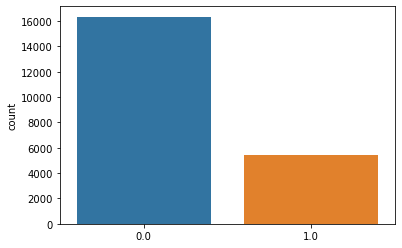

In [48]:
sns.countplot(final_predictions)

# 8.	
## Calculating (roc_auc_score) to each model and selecting one with highest score.

In [49]:
    model = DecisionTreeRegressor()
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xvalid)
    rc= roc_auc_score(yvalid, y_pred)
    roc_auc_list.append(rc)

    cmv = confusion_matrix(yvalid, y_pred)

In [50]:
cmv

array([[5949, 1788],
       [1655,  785]], dtype=int64)

# 9.
## Final submission.

In [51]:
submission.to_csv('my_submission.csv', index=False)